In [1]:

# coding: utf-8

# In[14]:

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

"""class TwoPathConv(nn.Module):
    def __init__(self):
        super(TwoPathConv, self).__init__()
        self.local_conv1 = nn.Conv2d(4, 64, 7, padding = 16)
        #self.dp1 = nn.Dropout2d(.3)
        self.local_conv2 = nn.Conv2d(64, 64, 3)
        #self.dp2 = nn.Dropout2d(.3)
        self.local_conv3 = nn.Conv2d(4, 160, 13, padding = 16)
        #self.dp3 = nn.Dropout2d(.3)
        self.total_conv = nn.Conv2d(224, 5, 21)

    def forward(self, x):
        under_x = F.relu(self.local_conv3(x))
        x = self.local_conv1(x)
        #x = self.dp1(x)
        x = F.max_pool2d(F.relu(x), 4, stride = 1)
        x = self.local_conv2(x)
        #x = self.dp2(x)
        x = F.max_pool2d(F.relu(x), 2, stride = 1)
        x = torch.cat((x, under_x), 1)
        x = self.total_conv(x)
        #x = x.view(-1,5)
        return x

class InputCasNet(nn.Module):
    def __init__(self):
        super(InputCasNet, self).__init__()
        self.first_upper_layer1=nn.Sequential(
            nn.Conv2d(4,64,7, padding=16),
            nn.ReLU(),
            nn.MaxPool2d((4,4),stride = 1)
        )
        self.first_upper_layer2=nn.Sequential(
            nn.Conv2d(64,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride = 1)
        )
        self.first_under_layer1=nn.Sequential(
            nn.Conv2d(4,160,13, padding=16),
            nn.ReLU()
        )
        
        self.first_final_layer=nn.Conv2d(224,5,21)
        
        self.second_upper_layer1=nn.Sequential(
            nn.Conv2d(9,64,7, padding=16),
            nn.ReLU(),
            nn.MaxPool2d((4,4),stride = 1)
        )
        self.second_upper_layer2=nn.Sequential(
            nn.Conv2d(64,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride = 1)
        )
        self.second_under_layer1=self.under_layer1 = nn.Sequential(
            nn.Conv2d(9,160,13, padding=16),
            nn.ReLU()
        )
        self.second_final_layer = nn.Conv2d(224,5,21)
    
    def forward(self, x1, x2):
        upper_x=self.first_upper_layer2(self.first_upper_layer1(x1))
        under_x=self.first_under_layer1(x1)
        x=torch.cat((upper_x, under_x), 1)
        x=self.first_final_layer(x)
        x2=torch.cat((x, x2), 1)
        upper_x2=self.second_upper_layer2(self.second_upper_layer1(x2))
        under_x2=self.second_under_layer1(x2)
        x3=torch.cat((upper_x2, under_x2), 1)
        x3=self.second_final_layer(x3)
        return x3

class TwoPathConv(nn.Module):
    def __init__(self):
        super(TwoPathConv, self).__init__()
        self.local_conv1 = nn.Conv2d(4, 64, 7, padding = 16)
        #self.bn1 = nn.BatchNorm2d(64)
        self.local_conv2 = nn.Conv2d(64, 64, 3)
        #self.bn2 = nn.BatchNorm2d(64)
        self.local_conv3 = nn.Conv2d(4, 160, 13, padding = 16)
        #self.bn3 = nn.BatchNorm2d(160)
        self.total_conv = nn.Conv2d(224, 5, 21)

    def forward(self, x):
        under_x = F.relu(self.local_conv3(x))
        x = self.local_conv1(x)
        #x = self.bn1(x)
        x = F.max_pool2d(F.relu(x), 4, stride = 1)
        x = self.local_conv2(x)
        #x = self.bn2(x)
        x = F.max_pool2d(F.relu(x), 2, stride = 1)
        x = torch.cat((x, under_x), 1)
        x = self.total_conv(x)
        return x


# In[2]:

class TwoPathConv_alter(nn.Module):
    def __init__(self):
        super(TwoPathConv_alter, self).__init__()
        self.upper_layer1 = nn.Sequential(
            nn.Conv2d(9,64,7, padding = 16),
            nn.ReLU(),
            nn.MaxPool2d((4,4),stride = 1)
        )
        self.upper_layer2 = nn.Sequential(
            nn.Conv2d(64,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride = 1)
        )
        self.under_layer1 = nn.Sequential(
            nn.Conv2d(9,160,13, padding = 16),
            nn.ReLU()
        )
        self.final_layer = nn.Conv2d(224,5,21)
    def forward(self, x):
        upper_x = self.upper_layer2(self.upper_layer1(x))
        under_x = self.under_layer1(x)
        out = torch.cat((under_x, upper_x), 1)
        return out    
    
class Cascaded(nn.Module):
    def __init__(self, net1, net2):
        super(Cascaded, self).__init__()
        self.twopathconv1 = net1
        self.twopathconv2 = net2
        self.final_layer = nn.Conv2d(224, 5, 21)
    def forward(self, x1, x2):
        upper_x = self.twopathconv1(x1)
        lower_x = torch.cat((upper_x, x2), 1)
        final_x = self.twopathconv2(lower_x)
        out = self.final_layer(final_x)
        return out
    
"""
class TwoPathConv3d(nn.Module):
    def __init__(self):
        super(TwoPathConv3d, self).__init__()
        self.local_conv1 = nn.Conv3d(4, 64, (7, 7, 3), padding = (16, 16, 0))
        self.local_conv2 = nn.Conv3d(64, 64, (3, 3, 3))
        self.local_conv3 = nn.Conv3d(4, 160, (13, 13, 5), padding = (16, 16, 0))
        self.total_conv = nn.Conv3d(224, 5, (21, 21, 1))

    def forward(self, x):
        under_x = F.relu(self.local_conv3(x))
        x = self.local_conv1(x)
        x = F.max_pool3d(F.relu(x), (4, 4, 1), stride = 1)
        x = self.local_conv2(x)
        x = F.max_pool3d(F.relu(x), (2, 2, 1), stride = 1)
        x = torch.cat((x, under_x), 1)
        x = self.total_conv(x)
        return x
        
import h5py
#challenge_f = h5py.File('Challenge.h5', 'r') #load challenge data

train_f = h5py.File('/home/yiqin/train/Unet-training.h5', 'r')
SAMPLE = [ "LG/0001", "LG/0002", "LG/0004", "LG/0006", "LG/0008", "LG/0011",
          "LG/0012", "LG/0013", "LG/0014", "LG/0015", "HG/0001", "HG/0002",
          "HG/0003", "HG/0004", "HG/0005", "HG/0006", "HG/0007", "HG/0008",
          "HG/0009", "HG/0010", "HG/0011", "HG/0012", "HG/0013", "HG/0014",
          "HG/0015", "HG/0022", "HG/0024", "HG/0025", "HG/0026", "HG/0027",]
"""
train_f = h5py.File('Challenge.h5', 'r')
SAMPLE = [ "HG/0301", "HG/0302",
          "HG/0303", "HG/0304", "HG/0305", "HG/0306", "HG/0307", "HG/0308",
          "HG/0309", "HG/0310", ]
"""
def create_test_batch(img = 0, z = 0):
    case = SAMPLE[img]
    case1 = case[:2]
    case2 = case[3:]
    batch = []
    _, X, Y, Z = train_f[case1][case2].shape
    img1 = train_f[case1][case2][:,:,:,z]
    batch.append(img1)
    batch = torch.from_numpy(np.array(batch))
    return batch

In [ ]:
# cas-net:
import time
import numpy as np
from torch.autograd import Variable
#net = InputCasNet()
net1 = TwoPathConv()
net2 = TwoPathConv_alter()
cas_net = Cascaded(net1, net2)
#net.load_state_dict(torch.load('phase2_input_cas_net.txt'))
cas_net.load_state_dict(torch.load('phase2_transfer_cas_net.txt'))
#net = net.cuda(1)
cas_net.cuda(1)

In [2]:
# TwoPathWay:
import time
import numpy as np
from torch.autograd import Variable
net = TwoPathConv3d()
net.load_state_dict(torch.load("/home/yiqin/TumorSeg/two_path_cnn/phase2_TwoPathConv_net3d.txt"))
net = net.cuda(1)

In [3]:
"""def create_3D_batch(img = 0, z = 0):
    case = SAMPLE[img]
    case1 = case[:2]
    case2 = case[3:]
    batch = []
    _, X, Y, Z = train_f[case1][case2].shape
    for i in range(z*5, z*5+9):
        img1 = train_f[case1][case2][:,:,:,i]
        batch.append(img1)
    batch = np.array(batch)
    batch = batch.transpose(1,2,3,0)
    temp = []
    temp.append(batch)
    batch = torch.from_numpy(np.array(temp))
    return batch"""

def create_3D_batch(img = 0, z = 0):
    case = SAMPLE[img]
    case1 = case[:2]
    case2 = case[3:]
    batch = []
    _, X, Y, Z = train_f[case1][case2].shape
    img1 = train_f[case1][case2][:4,:,:,z-2:z+3]
    batch.append(img1)
    batch = np.array(batch)
    batch = torch.from_numpy(batch)
    return batch

In [7]:
prev_time = time.clock()
#print(matrix_pred)
pred = {}

for i in range(len(SAMPLE)):
    img = SAMPLE[i]
    pred[img] = []
    case = SAMPLE[i]
    case1 = case[:2]
    case2 = case[3:]
    #_, X, Y, Z = challenge_f[case1][case2].shape
    _, X, Y, Z = train_f[case1][case2].shape
    print(X, Y, Z)
    '''
    for z in range(Z):
        x_batch = create_test_batch(img = i, z = z)
        x_batch = Variable(x_batch).cuda(1)
        y_pred = net.forward(x_batch)
        #y_pred = net.forward(x_batch)
        y_pred = y_pred.data.cpu().numpy()
        y_pred = y_pred.transpose(0,2,3,1)
        y_pred = np.reshape(y_pred, (-1, 5))
        pred[img].append(y_pred)
    '''
    tot = []
    for j in range(100,101):
        x_batch = create_3D_batch(i, j)
        x_batch = Variable(x_batch).cuda(1)
        y_pred = net.forward(x_batch)
        y_pred = y_pred.data.cpu().numpy()
        #print(y_pred.shape)
        y_pred = np.reshape(y_pred, (5, -1))
        y_pred = np.argmax(y_pred, axis = 0)
        y_pred = y_pred.reshape(X, Y)
        pred[img].append(y_pred)
        pred[img]=np.array(pred[img])
        
"""    
    pred[img] = np.array(pred[img])
    pred[img] = np.reshape(pred[img], (-1, 5))
    pred[img] = pred[img].argmax(axis = 1)
    pred[img] = np.reshape(pred[img], (-1, X, Y))
    pred[img] = pred[img].transpose(1, 2, 0)"""

158 180 140
160 187 146
159 184 140
156 167 140
170 184 148
152 173 148
151 181 133
159 175 138
164 187 145
166 200 153


'    \n    pred[img] = np.array(pred[img])\n    pred[img] = np.reshape(pred[img], (-1, 5))\n    pred[img] = pred[img].argmax(axis = 1)\n    pred[img] = np.reshape(pred[img], (-1, X, Y))\n    pred[img] = pred[img].transpose(1, 2, 0)'

160 216 176


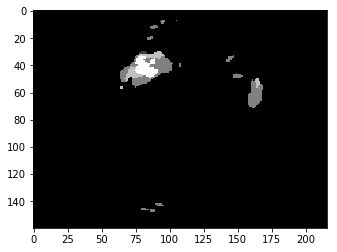

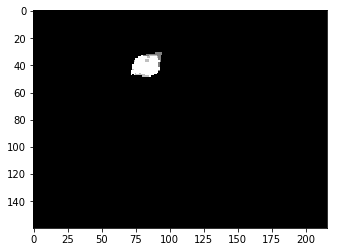

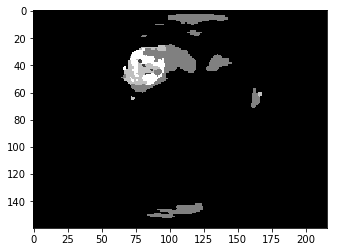

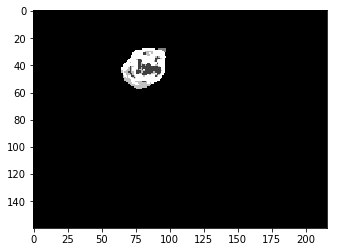

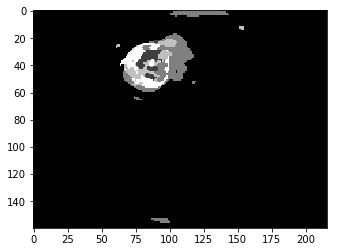

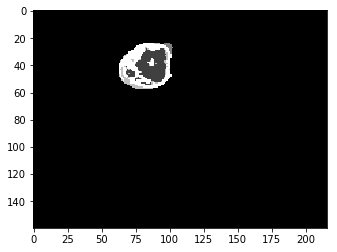

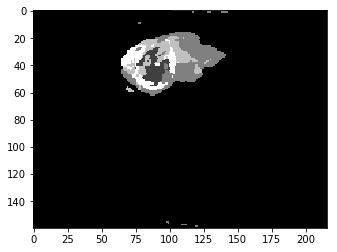

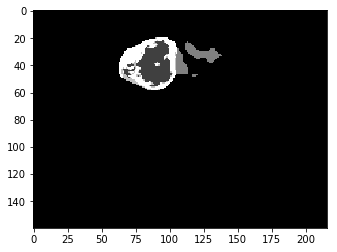

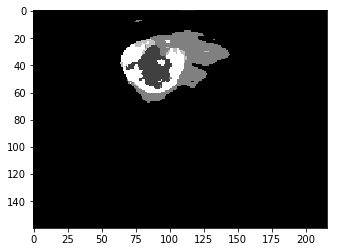

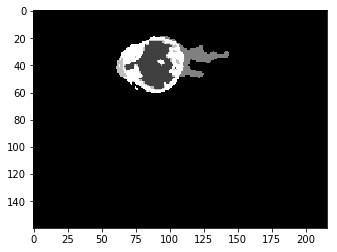

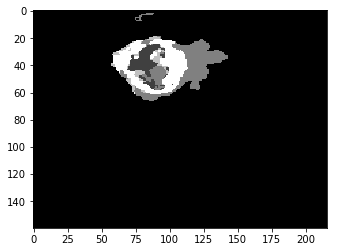

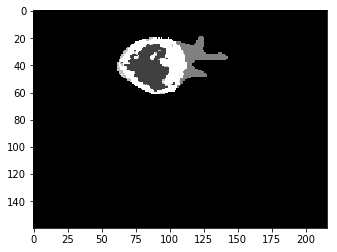

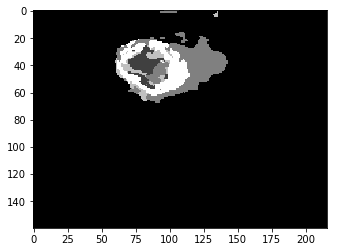

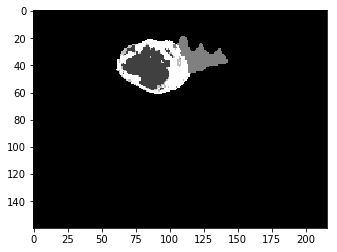

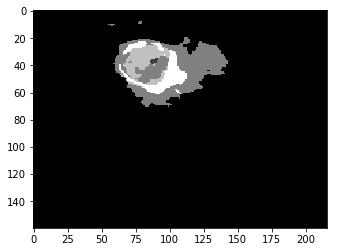

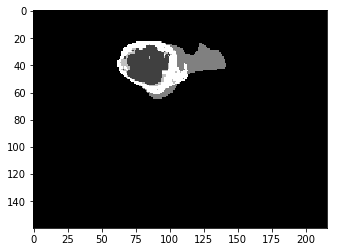

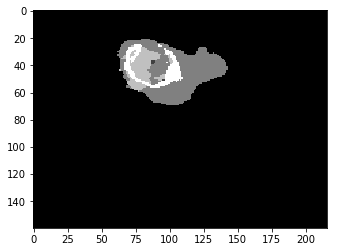

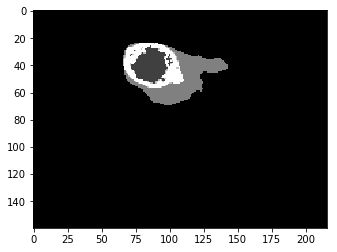

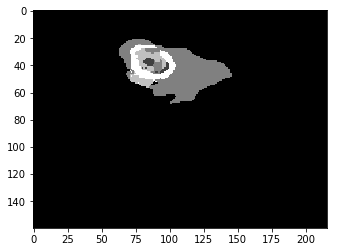

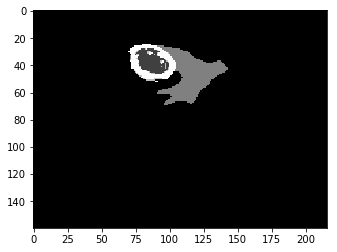

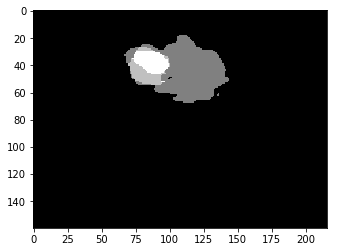

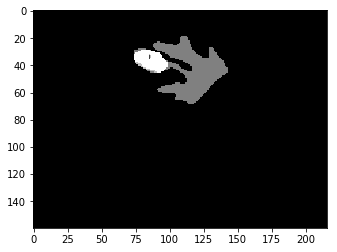

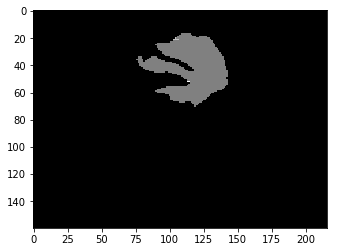

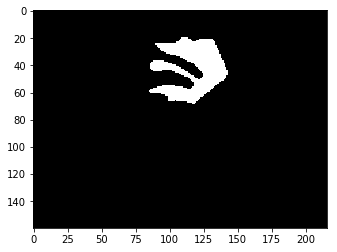

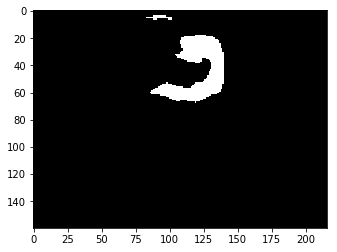

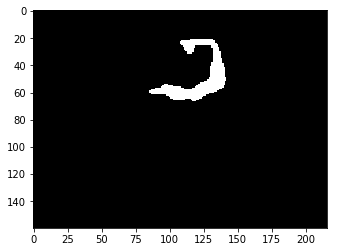

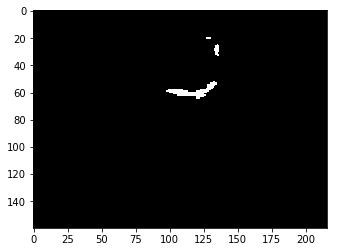

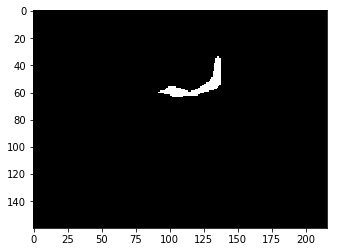

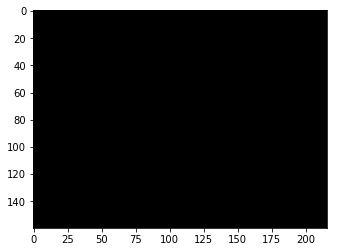

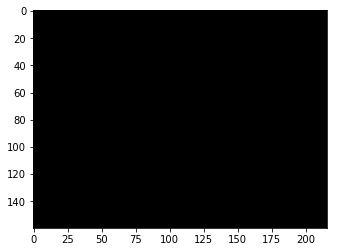

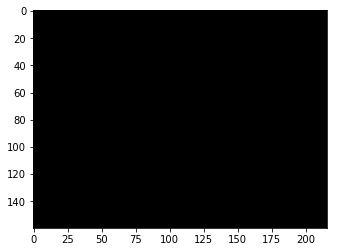

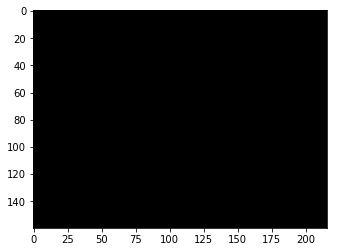

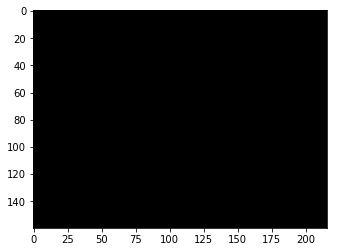

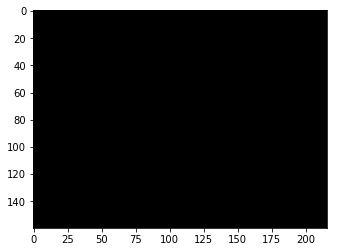

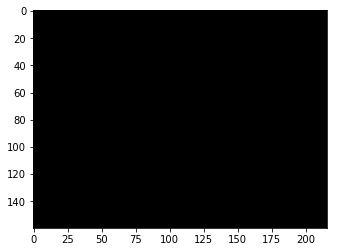

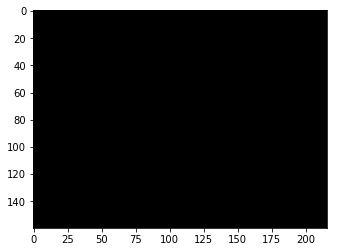

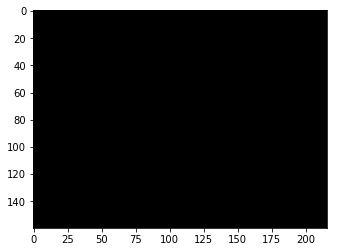

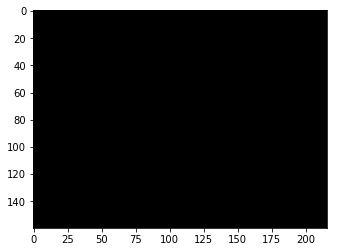

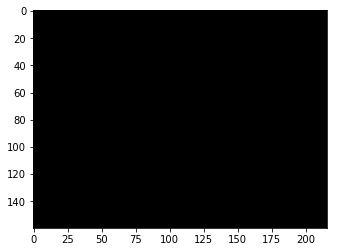

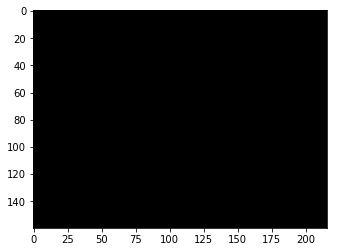

'    \n    pred[img] = np.array(pred[img])\n    pred[img] = np.reshape(pred[img], (-1, 5))\n    pred[img] = pred[img].argmax(axis = 1)\n    pred[img] = np.reshape(pred[img], (-1, X, Y))\n    pred[img] = pred[img].transpose(1, 2, 0)'

In [4]:
# Only look at HG0001

prev_time = time.clock()
#print(matrix_pred)
pred = {}
#for i in range(len(SAMPLE)):
for i in range(10,11):
    img = SAMPLE[i]
    pred[img] = []
    case = SAMPLE[i]
    case1 = case[:2]
    case2 = case[3:]
    #_, X, Y, Z = challenge_f[case1][case2].shape
    _, X, Y, Z = train_f[case1][case2].shape
    print(X, Y, Z)
    '''
    for z in range(Z):
        x_batch = create_test_batch(img = i, z = z)
        x_batch = Variable(x_batch).cuda(1)
        y_pred = net.forward(x_batch)
        #y_pred = net.forward(x_batch)
        y_pred = y_pred.data.cpu().numpy()
        y_pred = y_pred.transpose(0,2,3,1)
        y_pred = np.reshape(y_pred, (-1, 5))
        pred[img].append(y_pred)
    '''
    tot = []
    for j in range(50,150,5):
        x_batch = create_3D_batch(i, j)
        x_batch = Variable(x_batch).cuda(1)
        y_pred = net.forward(x_batch)
        y_pred = y_pred.data.cpu().numpy()
        y_pred = np.reshape(y_pred, (5, -1))
        y_pred = np.argmax(y_pred, axis = 0)
        y_pred = y_pred.reshape(X, Y)
        pred[img].append(y_pred)
        pred[img]=np.array(pred[img])
        
        array_img = pred[img]
        plt.imshow(array_img[0,:,:], cmap='gray')
        plt.show()
        plt.imshow(train_f['HG']['000%d'%(i - 9)][4,:,:,j], cmap = 'gray')
        plt.show()
        pred[img] = []
        
"""    
    pred[img] = np.array(pred[img])
    pred[img] = np.reshape(pred[img], (-1, 5))
    pred[img] = pred[img].argmax(axis = 1)
    pred[img] = np.reshape(pred[img], (-1, X, Y))
    pred[img] = pred[img].transpose(1, 2, 0)"""

(1, 159, 184)


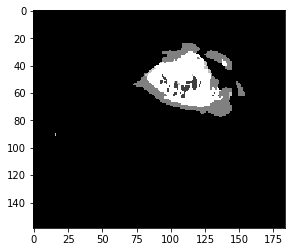

In [11]:
for img in range(2,3):
    array_img = pred[SAMPLE[img]]
    print(array_img.shape)
    #plt.imshow(matrix_pred[img][:,100,:], cmap='gray')
    plt.imshow(array_img[0,:,:], cmap='gray')
    plt.show()
    #plt.imshow(train_f['HG']['000%d'%(img - 9)][4,:,:,100], cmap = 'gray')
    #plt.show()

In [ ]:
for img in SAMPLE:
    print(pred[img].shape)

In [ ]:
import pickle
out_f = open('cas_net_challenge_pred.pkl','wb')
pickle.dump(pred, out_f)
out_f.close()

In [ ]:
import pickle
out_f = open('two_path_conv_challenge_pred.pkl','wb')
pickle.dump(pred, out_f)
out_f.close()

In [ ]:
import SimpleITK as sitk
import pickle

pkl_file = open('cas_net_challenge_pred.pkl', 'rb')
#pkl_file = open("two_path_conv_challenge_pred.pkl", 'rb')
pred_dict = pickle.load(pkl_file)
pkl_file.close()

ID = 17572
for i in range(len(SAMPLE)):
    img = SAMPLE[i]
    array_img = np.array(pred_dict[img], dtype = 'int16')
    array_img = array_img.transpose(2, 1, 0)
    out_img = sitk.GetImageFromArray(array_img)
    sitk.WriteImage(out_img, 'prediction-cas/VSD.P1_Seg_HG_30%d.%d.mha' %((i+1), ID + i*4))

In [ ]:
for s in SAMPLE:
    case1 = s[:2]
    case2 = s[3:]
    plt.imshow(pred_dict[s][:,:,100], cmap = 'gray')
    plt.show()
    for i in range(4):
        plt.imshow(train_f[case1][case2][i,:,:,100], cmap = 'gray')
        plt.show()

(140, 184, 159)


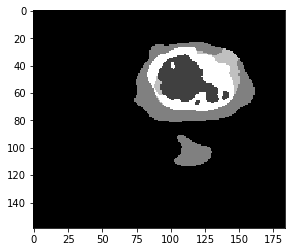

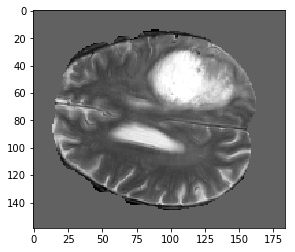

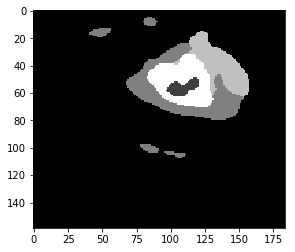

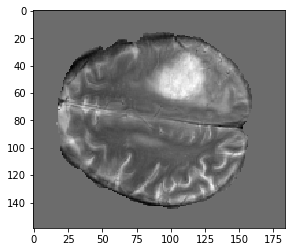

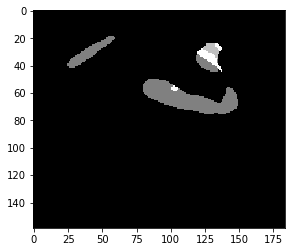

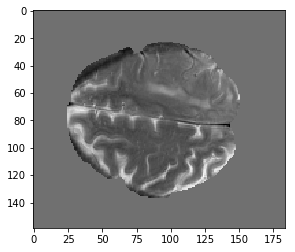

In [10]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
test_img = sitk.ReadImage('prediction-cas/VSD.P1_Seg_HG_303.17580.mha')
test_array = sitk.GetArrayFromImage(test_img)
print(test_array.shape)
for i in range(90, 120, 10):
    plt.imshow(test_array[i,:,:].transpose(1,0), cmap = 'gray')
    plt.show()
    plt.imshow(train_f['HG']['0303'][3,:,:,i], cmap = 'gray')
    plt.show()